<a href="https://colab.research.google.com/github/lampnis/ted-200-c/blob/main/ted200c_thermistor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the temperature measurement from Thorlabs TED 200 C Temperature controller

Below there is just a code that calculates the $\beta$ value and temperature in Celsius depending on the resistance reading $R$ on instrument.

$\beta=\frac{\ln (R/R_0)}{\frac{1}{T}-\frac{1}{T_0}}$

$T(R)=\frac{\beta T_0}{T_0 \ln(R/R_0)+\beta}$

There is also a quick helper function to convert from Kelvin to Celsius and vice versa.

In the last `print` statement, change just the value of the first argument in function `get_temp()`, where you enter the actual reading that you get.

You can change the calibration (`B_val_g`) depending on the actual thermistor by supplying actual values from your specs.

I attach additional manuals, where you can read more about the actual setup that I was using.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def c_to_k(temp_c):
  return 273.15+temp_c

def k_to_c(temp_k):
  return temp_k-273.15

def energy_constant(temp_room, temp_ohm, R_nominal):
  R = temp_ohm
  T = temp_room
  T_0 = 298.15 #K
  R_0 = R_nominal #Ohm
  return (c_to_k(T)*T_0*np.log(R/R_0)) / (T_0-c_to_k(T))

# Enter to calibrate:
# 1) current room temperature (in celsius)
# 2) idle reading of TED200C in 20kOhm mode (in Ohm)
# 3) rated resistance from thermistor specification
B_val_g = energy_constant(20.83, 12041, 10000)

def get_temp(temp_ohm, R_nominal):
  R = temp_ohm
  T_0 = 298.15
  R_0 = R_nominal
  B_val = B_val_g
  return B_val*T_0 / (T_0 * np.log(R/R_0) + B_val)

# enter R and R_0 values to get temperature
print(k_to_c(get_temp(12015, 10000)))


20.8778610423866


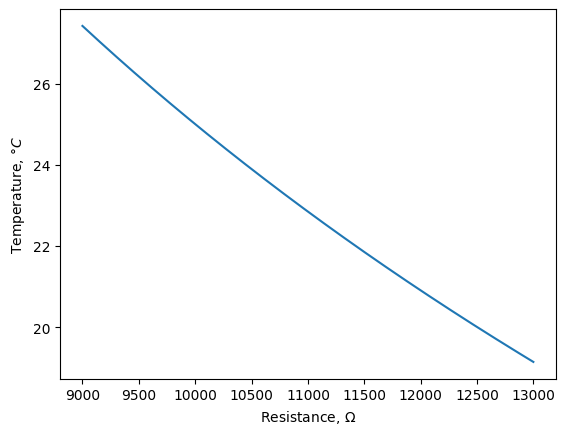

In [37]:
R_values = list(range(9000, 13000))
T_values = [k_to_c(get_temp(R, 10000)) for R in R_values]
plt.plot(R_values, T_values)
plt.xlabel("Resistance, $\Omega$")
plt.ylabel("Temperature, $\degree C$")
plt.show()